# Analyzing all Guyana forest concessions raster data on tree height in 2000 and 2020

In [50]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [51]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [25]:
df00 = pd.read_csv('analysis/2000 Guyana concessions forest height.csv')

In [26]:
df00.head()

,Value,Pixel count,Area (deg2)
0,32,12285563,0.767848
1,31,9448785,0.590549
2,30,8842283,0.552643
3,33,8237553,0.514847
4,29,6429235,0.401827


In [27]:
df00['Pixel count'].sum()

73549060

In [28]:
df20 = pd.read_csv('analysis/2020 Guyana concessions forest height.csv')

In [29]:
df20.head()

,Value,Pixel count,Area (deg2)
0,0,1723113,0.107695
1,3,87226,0.005452
2,4,122519,0.007657
3,5,301924,0.018870
4,6,232080,0.014505


In [30]:
df20['Pixel count'].sum()

73549060

In [31]:
df00['Pixels_2000'] = df00['Pixel count']

In [32]:
df00 = df00.drop(columns='Pixel count')

In [33]:
df00['Area_2000'] = df00['Area (deg2)']

In [34]:
df00 = df00.drop(columns='Area (deg2)')

In [36]:
df00['Pixels_pct_2000'] = df00['Pixels_2000'] / 73549060

In [37]:
df00.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000
0,32,12285563,0.767848,0.167039
1,31,9448785,0.590549,0.128469
2,30,8842283,0.552643,0.120223
3,33,8237553,0.514847,0.112001
4,29,6429235,0.401827,0.087414


In [47]:
df00.shape

(38, 4)

In [38]:
df20['Pixels_2020'] = df20['Pixel count']

In [39]:
df20 = df20.drop(columns='Pixel count')

In [40]:
df20['Area_2020'] = df20['Area (deg2)']

In [41]:
df20 = df20.drop(columns='Area (deg2)')

In [42]:
df20['Pixels_pct_2020'] = df20['Pixels_2020'] / 73549060

In [43]:
df20.head()

,Value,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,1723113,0.107695,0.023428
1,3,87226,0.005452,0.001186
2,4,122519,0.007657,0.001666
3,5,301924,0.018870,0.004105
4,6,232080,0.014505,0.003155


In [48]:
df20.shape

(38, 4)

In [45]:
df = df00.merge(df20, on='Value', how='outer')

In [46]:
df.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,1333613,0.083351,0.018132,1723113,0.107695,0.023428
1,3,26519,0.001657,0.000361,87226,0.005452,0.001186
2,4,100486,0.006280,0.001366,122519,0.007657,0.001666
3,5,345406,0.021588,0.004696,301924,0.018870,0.004105
4,6,164862,0.010304,0.002242,232080,0.014505,0.003155


In [61]:
df['Pixel_difference'] = df['Pixels_2020'] - df['Pixels_2000']

In [96]:
df['pct_difference'] = df['Pixels_pct_2020'] - df['Pixels_pct_2000']

In [97]:
df.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020,Pixel_difference,pct_difference
0,0,1333613,0.083351,0.018132,1723113,0.107695,0.023428,389500,0.005296
1,3,26519,0.001657,0.000361,87226,0.005452,0.001186,60707,0.000825
2,4,100486,0.006280,0.001366,122519,0.007657,0.001666,22033,0.000300
3,5,345406,0.021588,0.004696,301924,0.018870,0.004105,-43482,-0.000591
4,6,164862,0.010304,0.002242,232080,0.014505,0.003155,67218,0.000914


In [108]:
df.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020,Pixel_difference,pct_difference
0,0,1333613,0.083351,0.018132,1723113,0.107695,0.023428,389500,0.005296
1,3,26519,0.001657,0.000361,87226,0.005452,0.001186,60707,0.000825
2,4,100486,0.006280,0.001366,122519,0.007657,0.001666,22033,0.000300
3,5,345406,0.021588,0.004696,301924,0.018870,0.004105,-43482,-0.000591
4,6,164862,0.010304,0.002242,232080,0.014505,0.003155,67218,0.000914


In [49]:
df.shape

(38, 7)

In [109]:
df.to_csv('guyana_concessions_tree_height_raster_analysis_2000_2020.csv', index=False)

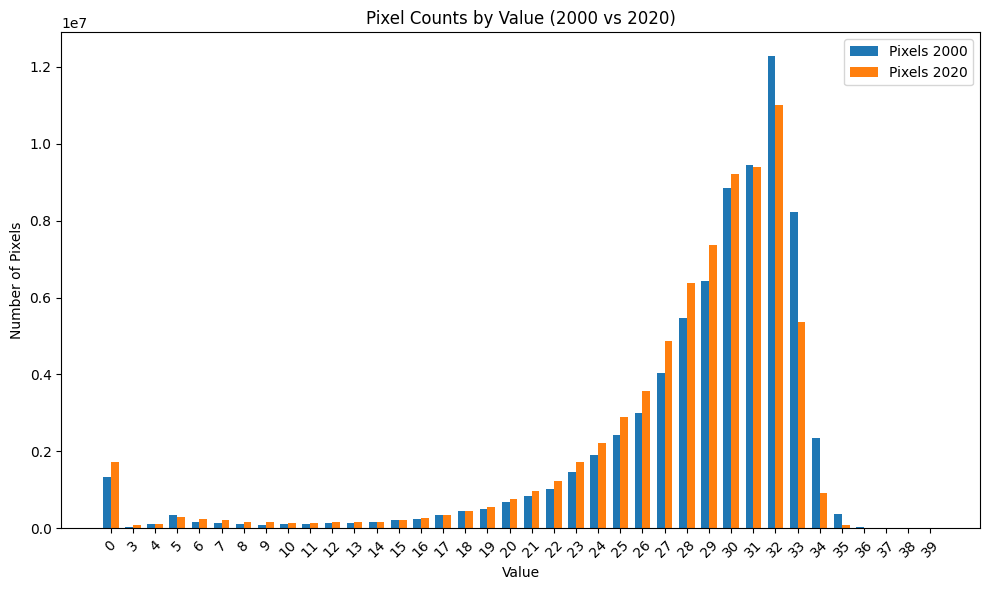

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Set the positions and width for the bars
x = np.arange(len(df['Value']))  # the label locations
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df['Pixels_2000'], width, label='Pixels 2000')
bars2 = ax.bar(x + width/2, df['Pixels_2020'], width, label='Pixels 2020')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Number of Pixels')
ax.set_title('Pixel Counts by Value (2000 vs 2020)')
ax.set_xticks(x)
ax.set_xticklabels(df['Value'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

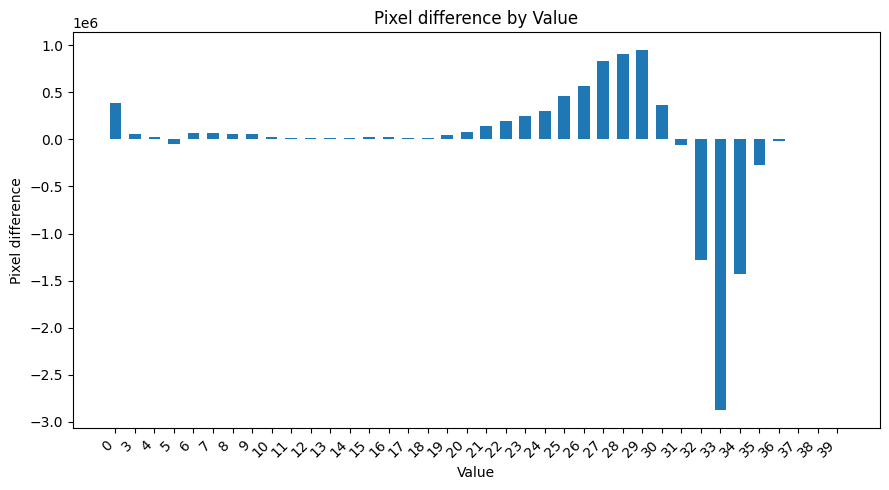

In [65]:
x = np.arange(len(df['Value']))        # one x‑tick per category
width = 0.6                            # bar width

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x, df['Pixel_difference'], width)

# axis labels & ticks
ax.set_xlabel('Value')
ax.set_ylabel('Pixel difference')
ax.set_title('Pixel difference by Value')
ax.set_xticks(x)
ax.set_xticklabels(df['Value'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [98]:
# Create a copy of the DataFrame to avoid modifying the original
df_grouped = df.copy()

# Define custom group labels
def group_label(val):
    if val == 0:
        return '0'
    elif 1 <= val <= 9:
        return '1-9'
    elif 10 <= val <= 19:
        return '10-19'
    elif 20 <= val <= 29:
        return '20-29'
    elif 30 <= val <= 39:
        return '30-39'
    else:
        return 'other'  # in case there are values outside your expected range

# Apply grouping
df_grouped['Value_Group'] = df_grouped['Value'].apply(group_label)

# Group by the new category and sum the relevant columns
columns_to_sum = [
    'Pixels_2000', 'Area_2000', 'Pixels_pct_2000',
    'Pixels_2020', 'Area_2020', 'Pixels_pct_2020'
]

df_result = df_grouped.groupby('Value_Group')[columns_to_sum].sum().reset_index()
df_result

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,1333613,0.083351,0.018132,1723113,0.107695,0.023428
1,1-9,978674,0.061167,0.013306,1260154,0.078760,0.017134
2,10-19,2405520,0.150345,0.032706,2606242,0.162890,0.035435
3,20-29,27291690,1.705731,0.371068,31992639,1.999540,0.434984
4,30-39,41539563,2.596223,0.564787,35966912,2.247932,0.489019


In [99]:
df_result['pct_change'] = (df_result['Pixels_pct_2020'] - df_result['Pixels_pct_2000']) / df_result['Pixels_pct_2000'] 

In [100]:
df_result.head()

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020,pct_change
0,0,1333613,0.083351,0.018132,1723113,0.107695,0.023428,0.292064
1,1-9,978674,0.061167,0.013306,1260154,0.078760,0.017134,0.287614
2,10-19,2405520,0.150345,0.032706,2606242,0.162890,0.035435,0.083442
3,20-29,27291690,1.705731,0.371068,31992639,1.999540,0.434984,0.172248
4,30-39,41539563,2.596223,0.564787,35966912,2.247932,0.489019,-0.134153


### The tallest group of trees decreased by 13% and were instead classified in shorter trees group (the next tallest group), while the amount of land without forest increased by 29% and the land with very short trees increased by 29%

# Same analysis for related concessions

In [66]:
rc00 = pd.read_csv('analysis/2000 related Guyana concessions forest height.csv')

In [67]:
rc00['Pixel count'].sum()

5824148

In [68]:
rc20 = pd.read_csv('analysis/2020 related Guyana concessions forest height.csv')

In [69]:
rc20['Pixel count'].sum()

5824130

In [70]:
rc00['Pixels_2000'] = rc00['Pixel count']

In [71]:
rc00 = rc00.drop(columns='Pixel count')

In [72]:
rc00['Area_2000'] = rc00['Area (deg2)']

In [73]:
rc00 = rc00.drop(columns='Area (deg2)')

In [74]:
rc00['Pixels_pct_2000'] = rc00['Pixels_2000'] / 5824148

In [75]:
rc00.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000
0,0,30499,0.001906,0.005237
1,3,555,0.000035,0.000095
2,4,1905,0.000119,0.000327
3,5,9085,0.000568,0.001560
4,6,4214,0.000263,0.000724


In [76]:
rc00.shape

(36, 4)

In [78]:
rc20['Pixels_2020'] = rc20['Pixel count']

In [79]:
rc20 = rc20.drop(columns='Pixel count')

In [81]:
rc20['Area_2020'] = rc20['Area (deg2)']

In [82]:
rc20.head()

,Value,Area (deg2),Pixels_2020,Area_2000,Area_2020
0,0,0.004232,67716,0.004232,0.004232
1,3,0.000388,6213,0.000388,0.000388
2,4,0.000409,6551,0.000409,0.000409
3,5,0.000792,12679,0.000792,0.000792
4,6,0.000612,9786,0.000612,0.000612


In [83]:
rc20 = rc20.drop(columns={'Area (deg2)','Area_2000'})

In [84]:
rc20['Pixels_pct_2020'] = rc20['Pixels_2020'] / 5824130

In [85]:
rc20.head()

,Value,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,67716,0.004232,0.011627
1,3,6213,0.000388,0.001067
2,4,6551,0.000409,0.001125
3,5,12679,0.000792,0.002177
4,6,9786,0.000612,0.001680


In [87]:
rc00.shape

(36, 4)

In [88]:
rc = rc00.merge(rc20, on='Value', how='outer')

In [89]:
rc.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,30499,0.001906,0.005237,67716,0.004232,0.011627
1,3,555,0.000035,0.000095,6213,0.000388,0.001067
2,4,1905,0.000119,0.000327,6551,0.000409,0.001125
3,5,9085,0.000568,0.001560,12679,0.000792,0.002177
4,6,4214,0.000263,0.000724,9786,0.000612,0.001680


In [104]:
avg_2000 = (df['Value'] * df['Pixels_2000']).sum() / df['Pixels_2000'].sum()

In [105]:
avg_2000

28.299627595512437

In [106]:
avg_2020 = (df['Value'] * df['Pixels_2020']).sum() / df['Pixels_2020'].sum()

In [107]:
avg_2020

27.52662229809599

In [93]:
rc['Pixel_difference'] = rc['Pixels_2020'] - rc['Pixels_2000']

In [94]:
rc.shape

(36, 8)

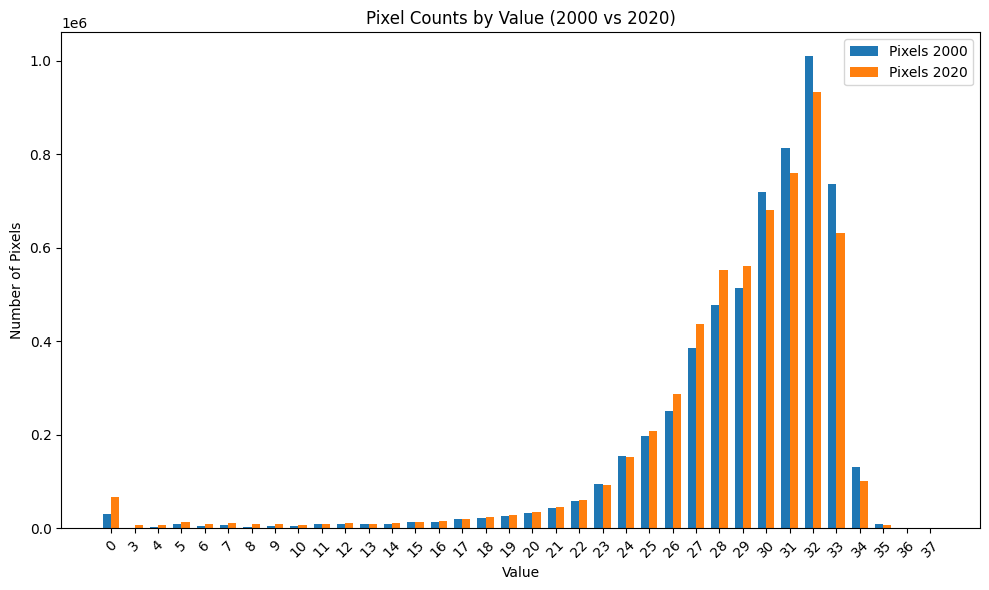

In [92]:
#Set the positions and width for the bars
x = np.arange(len(rc['Value']))  # the label locations
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rc['Pixels_2000'], width, label='Pixels 2000')
bars2 = ax.bar(x + width/2, rc['Pixels_2020'], width, label='Pixels 2020')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Number of Pixels')
ax.set_title('Pixel Counts by Value (2000 vs 2020)')
ax.set_xticks(x)
ax.set_xticklabels(rc['Value'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

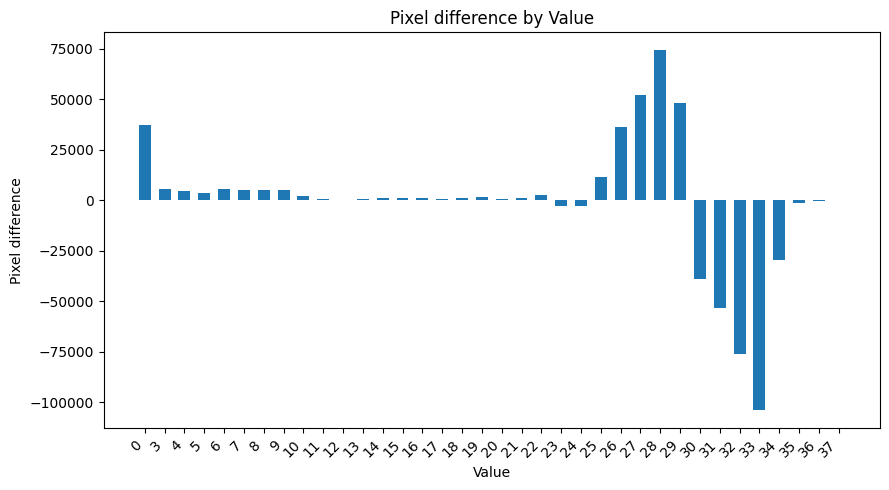

In [95]:
x = np.arange(len(rc['Value']))        # one x‑tick per category
width = 0.6                            # bar width

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x, rc['Pixel_difference'], width)

# axis labels & ticks
ax.set_xlabel('Value')
ax.set_ylabel('Pixel difference')
ax.set_title('Pixel difference by Value')
ax.set_xticks(x)
ax.set_xticklabels(rc['Value'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [101]:
# Create a copy of the DataFrame to avoid modifying the original
rc_grouped = rc.copy()

# Define custom group labels
def group_label(val):
    if val == 0:
        return '0'
    elif 1 <= val <= 9:
        return '1-9'
    elif 10 <= val <= 19:
        return '10-19'
    elif 20 <= val <= 29:
        return '20-29'
    elif 30 <= val <= 39:
        return '30-39'
    else:
        return 'other'  # in case there are values outside your expected range

# Apply grouping
rc_grouped['Value_Group'] = rc_grouped['Value'].apply(group_label)

# Group by the new category and sum the relevant columns
columns_to_sum = [
    'Pixels_2000', 'Area_2000', 'Pixels_pct_2000',
    'Pixels_2020', 'Area_2020', 'Pixels_pct_2020'
]

rc_result = rc_grouped.groupby('Value_Group')[columns_to_sum].sum().reset_index()
rc_result

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,30499,0.001906,0.005237,67716,0.004232,0.011627
1,1-9,29411,0.001838,0.005050,64000,0.004000,0.010989
2,10-19,136808,0.008551,0.023490,146961,0.009185,0.025233
3,20-29,2210847,0.138179,0.379600,2432349,0.152022,0.417633
4,30-39,3416583,0.213537,0.586624,3113104,0.194569,0.534518


In [102]:
rc_result['pct_change'] = (rc_result['Pixels_pct_2020'] - rc_result['Pixels_pct_2000']) / rc_result['Pixels_pct_2000'] 

In [103]:
rc_result

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020,pct_change
0,0,30499,0.001906,0.005237,67716,0.004232,0.011627,1.220276
1,1-9,29411,0.001838,0.005050,64000,0.004000,0.010989,1.176063
2,10-19,136808,0.008551,0.023490,146961,0.009185,0.025233,0.074217
3,20-29,2210847,0.138179,0.379600,2432349,0.152022,0.417633,0.100192
4,30-39,3416583,0.213537,0.586624,3113104,0.194569,0.534518,-0.088822
